# **_Outliers: Z-Score vs. Trim_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter Notebook is an extrapolation on a coding lesson from the **Data Normalization and Outliers** section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goal:_**

-   Given a Gaussian/normal distribution with some forced outliers at the edges, compare the following methods for identifying outliers:

    1. Regular Z-Score Method, use `3` standared deviations.

    2. Data Trim Method: most extreme values above a certain percentile, use `95%`.

    3. Data Trim Method: remove `k` number of most extreme values, choose `3` most extreme values.

-   Run five tests on similar distributions, see if a pattern emerges.    

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Code:_**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

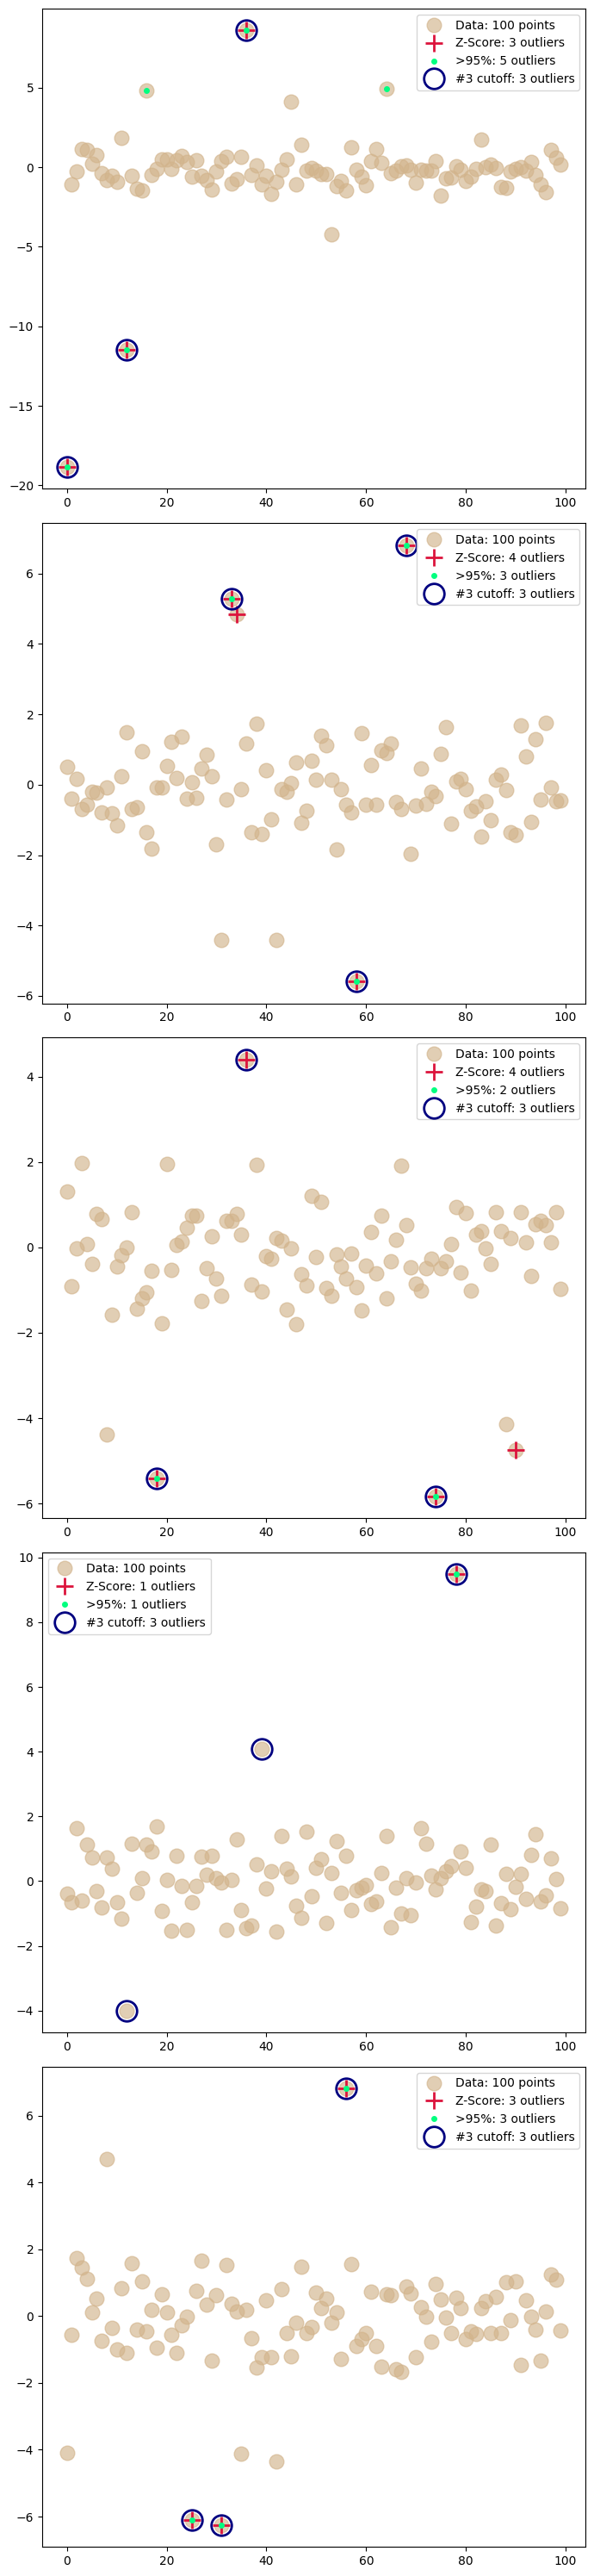

In [2]:
# Number of datapoints:
n = 100

# Instantiate figure and subplot axes:
fig, ax = plt.subplots(5, 1, figsize=(7, 30))

# Run five tests with varying data.
# See how the three outlier id methods work.
for i in range(len(ax)):
    # Create stretched normal distribution:
    data = np.random.randn(n)
    # Force outliers:
    data[data < -2] = -data[data < -2] ** 2
    data[data > 2] = data[data > 2] ** 2

    # Get z-score outliers:
    data_mean = np.mean(data)
    data_std = np.std(data, ddof=1)
    data_z = (data - data_mean) / data_std
    z_thresh = 3
    z_outlier_ind = np.where(abs(data_z) > z_thresh)[0]

    # Get trim/percentile outliers:
    data_mc = data - np.mean(data)
    trim_pct = 5
    data_trim_pct = np.percentile(abs(data_mc), trim_pct)
    trim_pct_outl_ind = np.where(abs(data_mc) > trim_pct)[0]

    # Get trim/k-value-cutoff outliers:
    trim_k = 3
    trim_k_sort = np.argsort(abs(data_mc), axis=0)[::-1]
    trim_k_outl_ind = np.squeeze(trim_k_sort[:trim_k])

    # Plot all data points:
    ax[i].plot(
        data, "o", color="tan", ms=12, alpha=0.65, label=f"Data: {len(data)} points"
    )

    # Indicate z-score id'd outliers:
    ax[i].plot(
        z_outlier_ind,
        data[z_outlier_ind],
        "+",
        ms=15,
        mec="crimson",
        mew=2,
        label=f"Z-Score: {len(z_outlier_ind)} outliers",
    )

    # Indicate trim/percentile id'd outliers:
    ax[i].plot(
        trim_pct_outl_ind,
        data[trim_pct_outl_ind],
        ".",
        color="springgreen",
        ms=6,
        mew=2,
        label=f">{100 - trim_pct}%: {len(trim_pct_outl_ind)} outliers",
    )

    # Indicate trim/k-val-cutoff id'd outliers:
    ax[i].plot(
        trim_k_outl_ind,
        data[trim_k_outl_ind],
        "o",
        color="navy",
        mfc="none",
        ms=17,
        mew=2,
        label=f"#{trim_k} cutoff: {len(trim_k_outl_ind)} outliers",
    )

    ax[i].legend()

plt.tight_layout()
plt.show()

-   The Regular Z-Score Method performs best for identifying outliers in a normal distribution with some outliers at the tails.

-   The z-score algorithm/method for identifying outliers works most favorably across the different datasets. The z-score outliers more consistently align visually with where common sense would identify outliers.

-   I'm not happy with the trim/percentile outlier identification results. It depends on where you draw the line, but it appears lots of valid datapoints have been identified as outliers.

-   The `k`/'hard-value-cutoff' trim method marks well some outliers, but depending on the value of `k`, we're left with either too many valid datapoints included or _excluded_ in the outlier set.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>